<a href="https://colab.research.google.com/github/yoonwanggyu/Alpaco_Project/blob/main/%EC%9D%B4%EB%AF%B8%EC%A7%80_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8(05.13~05.29)/%EC%9D%B4%EB%AF%B8%EC%A7%80_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**데이터**
- https://www.kaggle.com/datasets/ikarus777/best-artworks-of-all-time

- 데이터 증강 : TrivialAugmentWide
- 모델 : Vit

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unzip -q "/content/drive/MyDrive/images.zip" -d "/content/drive/MyDrive"

# 파이토치

In [2]:
from __future__ import print_function
from __future__ import division

# System
import sys
import os #
import argparse
import copy #


# Time
import time #
import datetime

# Numerical Data
import random
import numpy as np #
import pandas as pd

# Tools
import collections
import shutil
from glob import glob
from tqdm import tqdm
import gc

# NLP
import re

# Preprocessing
from sklearn import preprocessing
from sklearn.utils import class_weight as cw
from sklearn.utils import shuffle

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn import svm
from sklearn.svm import LinearSVC, SVC

# Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score


# Deep Learning -  -  Preprocessing

# Deep Learning -  - Model
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, models, transforms

# Deep Learning -  - Layers

from keras.regularizers import l2

# Deep Learning -  - Pretrained Models

# Deep Learning - Keras - Model Parameters and Evaluation Metrics
import torch.optim as optim

# Deep Learning -  - Visualisation

# Deep Learning - TensorFlow
# import tensorflow as tf

# Graph/ Visualization
import matplotlib.pyplot as plt #
from matplotlib.pyplot import figure
import matplotlib.image as mpimg
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix

# Image
import cv2
from PIL import Image
from IPython.display import display

# np.random.seed(42)

print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

# Input data
print(os.listdir("/content/drive/MyDrive/images"))

%matplotlib inline

PyTorch Version:  2.2.1+cu121
Torchvision Version:  0.17.1+cu121
['Amedeo_Modigliani', 'Vasiliy_Kandinskiy', 'Diego_Rivera', 'Claude_Monet', 'Rene_Magritte', 'Salvador_Dali', 'Edouard_Manet', 'Andrei_Rublev', 'Vincent_van_Gogh', 'Gustav_Klimt', 'Hieronymus_Bosch', 'Kazimir_Malevich', 'Peter_Paul_Rubens', 'Pierre-Auguste_Renoir', 'Francisco_Goya', 'Frida_Kahlo', 'El_Greco', 'Albrecht_Dürer', 'Alfred_Sisley', 'Pieter_Bruegel', 'Giotto_di_Bondone', 'Sandro_Botticelli', 'Caravaggio', 'Diego_Velazquez', 'Henri_Matisse', 'Jan_van_Eyck', 'Edgar_Degas', 'Rembrandt', 'Titian', 'Henri_de_Toulouse-Lautrec', 'Gustave_Courbet', 'Camille_Pissarro', 'William_Turner', 'Edvard_Munch', 'Eugene_Delacroix', 'Henri_Rousseau', 'Georges_Seurat', 'Paul_Klee', 'Piet_Mondrian', 'Joan_Miro', 'Andy_Warhol', 'Raphael', 'Jackson_Pollock', 'Leonardo_da_Vinci', 'Marc_Chagall', 'Michelangelo', 'Mikhail_Vrubel', 'Pablo_Picasso', 'Paul_Cezanne', 'Paul_Gauguin']


In [3]:
data_dir = "/content/drive/MyDrive/images"

input_directory = r"/content/drive/MyDrive/images"
output_directory = r"../output/"


# training_dir = input_directory + "images/images"
training_dir = data_dir
# testing_dir = input_directory + r"images/images"
testing_dir = data_dir

if not os.path.exists(output_directory):
    os.mkdir(output_directory)

figure_directory = "../output/figures"
if not os.path.exists(figure_directory):
    os.mkdir(figure_directory)


file_name_pred_batch = figure_directory + r"/result"
file_name_pred_sample = figure_directory + r"/sample"

In [4]:
i = 1
for dir in (os.listdir(data_dir)):
    print(" {}. {}".format(i, dir))
    i = i + 1

 1. Amedeo_Modigliani
 2. Vasiliy_Kandinskiy
 3. Diego_Rivera
 4. Claude_Monet
 5. Rene_Magritte
 6. Salvador_Dali
 7. Edouard_Manet
 8. Andrei_Rublev
 9. Vincent_van_Gogh
 10. Gustav_Klimt
 11. Hieronymus_Bosch
 12. Kazimir_Malevich
 13. Peter_Paul_Rubens
 14. Pierre-Auguste_Renoir
 15. Francisco_Goya
 16. Frida_Kahlo
 17. El_Greco
 18. Albrecht_Dürer
 19. Alfred_Sisley
 20. Pieter_Bruegel
 21. Giotto_di_Bondone
 22. Sandro_Botticelli
 23. Caravaggio
 24. Diego_Velazquez
 25. Henri_Matisse
 26. Jan_van_Eyck
 27. Edgar_Degas
 28. Rembrandt
 29. Titian
 30. Henri_de_Toulouse-Lautrec
 31. Gustave_Courbet
 32. Camille_Pissarro
 33. William_Turner
 34. Edvard_Munch
 35. Eugene_Delacroix
 36. Henri_Rousseau
 37. Georges_Seurat
 38. Paul_Klee
 39. Piet_Mondrian
 40. Joan_Miro
 41. Andy_Warhol
 42. Raphael
 43. Jackson_Pollock
 44. Leonardo_da_Vinci
 45. Marc_Chagall
 46. Michelangelo
 47. Mikhail_Vrubel
 48. Pablo_Picasso
 49. Paul_Cezanne
 50. Paul_Gauguin


In [6]:
label_df = pd.read_csv("/content/drive/MyDrive/artists.csv")
# label_df.head()
label_df

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194
5,5,Salvador Dali,1904 - 1989,Surrealism,Spanish,Salvador Domingo Felipe Jacinto Dalí i Domènec...,http://en.wikipedia.org/wiki/Salvador_Dalí,139
6,6,Edouard Manet,1832 - 1883,"Realism,Impressionism",French,Édouard Manet (US: ; UK: ; French: [edwaʁ manɛ...,http://en.wikipedia.org/wiki/Édouard_Manet,90
7,7,Andrei Rublev,1360 - 1430,Byzantine Art,Russian,"Andrei Rublev (Russian: Андре́й Рублёв, IPA: [...",http://en.wikipedia.org/wiki/Andrei_Rublev,99
8,8,Vincent van Gogh,1853 – 1890,Post-Impressionism,Dutch,Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...,http://en.wikipedia.org/wiki/Vincent_van_Gogh,877
9,9,Gustav Klimt,1862 - 1918,"Symbolism,Art Nouveau",Austrian,"Gustav Klimt (July 14, 1862 – February 6, 1918...",http://en.wikipedia.org/wiki/Gustav_Klimt,117


[]

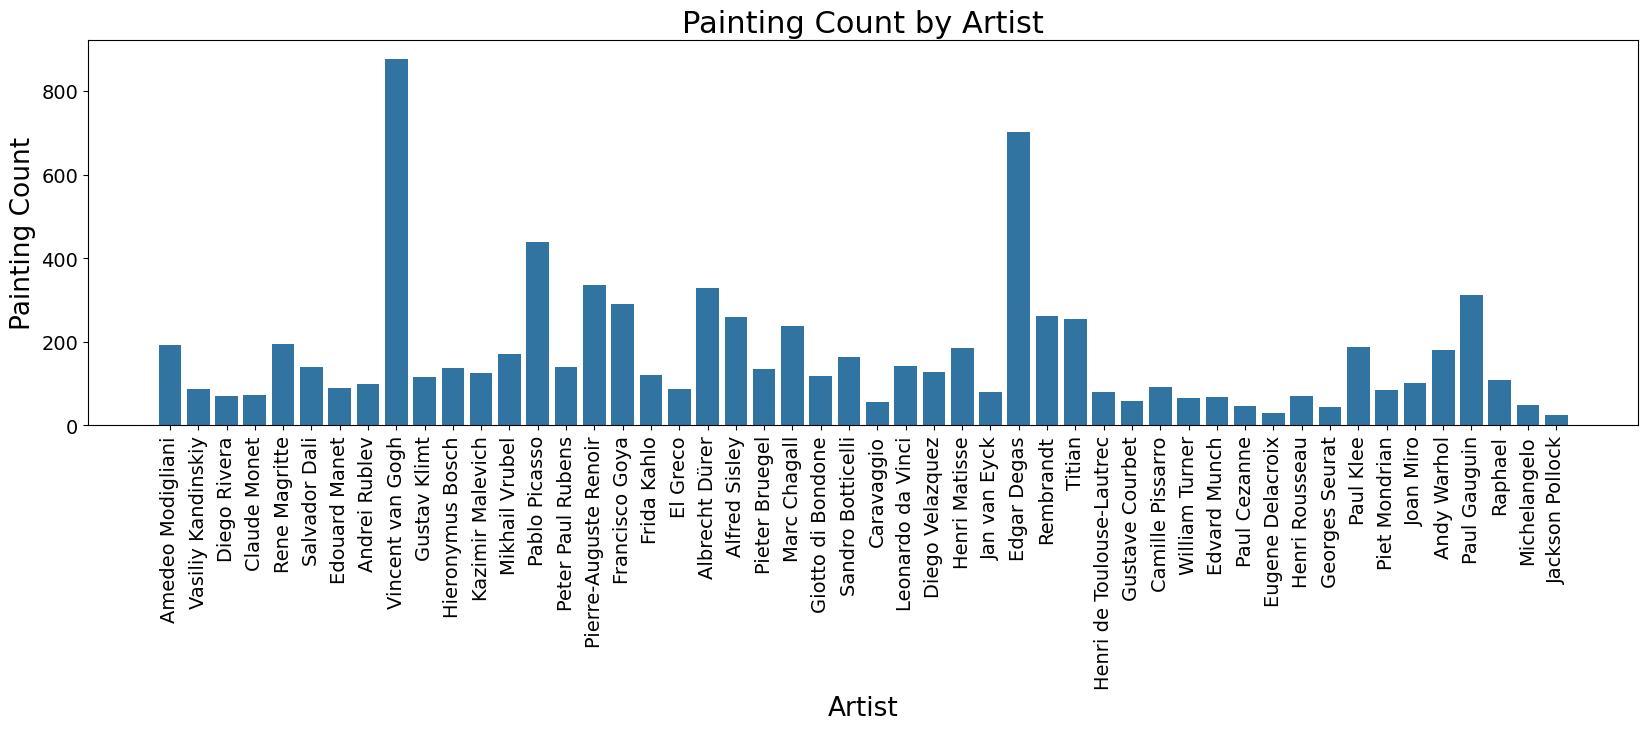

In [7]:
df = label_df

figsize=(20, 5)

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 5

xlabel = "Artist"
ylabel = "Painting Count"

title = "Painting Count by Artist"


params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

col1 = "name"
col2 = "paintings"

sns.barplot(x=col1, y=col2, data=df)
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation=90)
plt.plot()

데이터의 불균형 문제
위의 그래프에서 보이는 것처럼 Vicent Van Gogh와 Edgar Degas화가의 작품이 800개 이상으로 다른 화가 작품들 보다 압도적으로 많습니다.

문제를 해결하기 위해서 TrivialAugmentWide 사용하였습니다.

**모델 선택**

In [31]:
# Models to choose from [resnet, alexnet, vgg, squeezenet, densenet, inception]
# model_name = "resnet"
# model_name = "vgg"
# model_name = "densenet"
# model_name = "inception"
model_name = 'ViT'
# Number of classes
num_classes = len(os.listdir(data_dir))
print(num_classes)

# Batch size for training
batch_size = 32
# batch_size = 192

# Number of epochs
num_epochs = 15

# Flag for feature extracting. When False, we finetune the whole model,
#   when True we only update the reshaped layer params
feature_extract = True

50


In [32]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25, is_inception=False):
    since = time.time()

    val_acc_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)

                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    # Get model outputs and calculate loss
                    # Special case for inception because in training it has an auxiliary output. In train
                    #   mode we calculate the loss by summing the final output and the auxiliary output
                    #   but in testing we only consider the final output.
                    if is_inception and phase == 'train':
                        # From https://discuss.pytorch.org/t/how-to-optimize-inception-model-with-auxiliary-classifiers/7958
                        outputs, aux_outputs = model(inputs)
                        loss1 = criterion(outputs, labels)
                        loss2 = criterion(aux_outputs, labels)
                        loss = loss1 + 0.4*loss2
                    else:
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == 'val':
                val_acc_history.append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

In [33]:
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

In [34]:
from transformers import ViTForImageClassification

In [50]:
def initialize_model(model_name , num_classes, feature_extract, use_pretrained=True):
    # Initialize these variables which will be set in this if statement. Each of these
    #   variables is model specific.
    model_ft = None
    input_size = 0

    if model_name == "resnet":
        """ Resnet18
        """
        model_ft = models.resnet18(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs, num_classes)
        input_size = 256

    elif model_name == "alexnet":
        """ Alexnet
        """
        model_ft = models.alexnet(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier[6].in_features
        model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    elif model_name == "vgg":
        """ VGG11_bn
        """
        model_ft = models.vgg11_bn(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier[6].in_features
        model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    elif model_name == "squeezenet":
        """ Squeezenet
        """
        model_ft = models.squeezenet1_0(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        model_ft.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), stride=(1,1))
        model_ft.num_classes = num_classes
        input_size = 224

    elif model_name == "densenet":
        """ Densenet
        """
        model_ft = models.densenet121(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier.in_features
        model_ft.classifier = nn.Linear(num_ftrs, num_classes)
        input_size = 224

    elif model_name == "inception":
        """ Inception v3
        Be careful, expects (299,299) sized images and has auxiliary output
        """
        model_ft = models.inception_v3(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        # Handle the auxilary net
        num_ftrs = model_ft.AuxLogits.fc.in_features
        model_ft.AuxLogits.fc = nn.Linear(num_ftrs, num_classes)
        # Handle the primary net
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs,num_classes)
        input_size = 299

    elif model_name == 'ViT':
        """ Vision Transformer (ViT) """
        model_name = "google/vit-base-patch16-224"
        model_ft = ViTForImageClassification.from_pretrained(model_name)
        model_ft.classifier = nn.Linear(in_features=768, out_features=num_classes, bias=True)
        input_size = 256

    else:
        print("Invalid model name, exiting...")
        exit()

    return model_ft, input_size

In [52]:
# Initialize the model for this run
model_ft, input_size = initialize_model(model_name, num_classes, feature_extract, use_pretrained=True)

# Print the model we just instantiated
print(model_ft)
print(input_size)

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=7

**데이터 증강법**

In [45]:
# Data augmentation and normalization for training
# Just normalization for validation
  # data_transforms = {
  #    'train': transforms.Compose([
  #        transforms.RandomResizedCrop(input_size),
  #        transforms.RandomHorizontalFlip(),
  #        transforms.ToTensor(),
  #        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
  #    ]),
  #    'val': transforms.Compose([
  #        transforms.Resize(input_size),
  #        transforms.CenterCrop(input_size),
  #        transforms.ToTensor(),
  #        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
  #    ]),
  # }


# TrivialAugmentWide
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(size=input_size),
        transforms.TrivialAugmentWide(num_magnitude_bins=8),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(size=input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}


In [46]:
print("Initializing Datasets and Dataloaders...")

# Create training and validation datasets
image_datasets = {x: datasets.ImageFolder(data_dir, data_transforms[x]) for x in ['train', 'val']}
# Create training and validation dataloaders
dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train', 'val']}

# # Detect if we have a GPU available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
image_datasets

Initializing Datasets and Dataloaders...


{'train': Dataset ImageFolder
     Number of datapoints: 8446
     Root location: /content/drive/MyDrive/images
     StandardTransform
 Transform: Compose(
                Resize(size=224, interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=8, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ),
 'val': Dataset ImageFolder
     Number of datapoints: 8446
     Root location: /content/drive/MyDrive/images
     StandardTransform
 Transform: Compose(
                Resize(size=224, interpolation=bilinear, max_size=None, antialias=True)
                CenterCrop(size=(224, 224))
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            )}

In [54]:
# Data loading code
# traindir = "../input/images/images"
traindir = data_dir

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

train_dataset = datasets.ImageFolder(
    traindir,
    transforms.Compose(data_transforms['train']))

train_sampler = None


train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=(train_sampler is None),
    num_workers=2, pin_memory=True, sampler=train_sampler)

In [ ]:
train_loader

In [55]:
# Send the model to GPU
model_ft = model_ft.to(device)

# Gather the parameters to be optimized/updated in this run. If we are
#  finetuning we will be updating all parameters. However, if we are
#  doing feature extract method, we will only update the parameters
#  that we have just initialized, i.e. the parameters with requires_grad
#  is True.
params_to_update = model_ft.parameters()
print("Params to learn:")
if feature_extract:
    params_to_update = []
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print("\t",name)
else:
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            print("\t",name)

# Observe that all parameters are being optimized
# optimizer_ft = optim.SGD(params_to_update, lr=0.001, momentum=0.9)
# optimizer_ft = optim.Adam(params_to_update, lr=1e-3, betas=(0.9, 0.999), eps=1e-8, weight_decay=0, amsgrad=False)
optimizer_ft = optim.Adam(params_to_update, lr=1e-3)

# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

Params to learn:
	 vit.embeddings.cls_token
	 vit.embeddings.position_embeddings
	 vit.embeddings.patch_embeddings.projection.weight
	 vit.embeddings.patch_embeddings.projection.bias
	 vit.encoder.layer.0.attention.attention.query.weight
	 vit.encoder.layer.0.attention.attention.query.bias
	 vit.encoder.layer.0.attention.attention.key.weight
	 vit.encoder.layer.0.attention.attention.key.bias
	 vit.encoder.layer.0.attention.attention.value.weight
	 vit.encoder.layer.0.attention.attention.value.bias
	 vit.encoder.layer.0.attention.output.dense.weight
	 vit.encoder.layer.0.attention.output.dense.bias
	 vit.encoder.layer.0.intermediate.dense.weight
	 vit.encoder.layer.0.intermediate.dense.bias
	 vit.encoder.layer.0.output.dense.weight
	 vit.encoder.layer.0.output.dense.bias
	 vit.encoder.layer.0.layernorm_before.weight
	 vit.encoder.layer.0.layernorm_before.bias
	 vit.encoder.layer.0.layernorm_after.weight
	 vit.encoder.layer.0.layernorm_after.bias
	 vit.encoder.layer.1.attention.attention

In [56]:
# Train and evaluate
model_ft, hist = train_model(model_ft, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs)

Epoch 0/14
----------


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/fetch.py", line 54, in fetch
    return self.collate_fn(data)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/collate.py", line 277, in default_collate
    return collate(batch, collate_fn_map=default_collate_fn_map)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/collate.py", line 144, in collate
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/collate.py", line 144, in <listcomp>
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/collate.py", line 121, in collate
    return collate_fn_map[elem_type](batch, collate_fn_map=collate_fn_map)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/collate.py", line 173, in collate_tensor_fn
    out = elem.new(storage).resize_(len(batch), *list(elem.size()))
RuntimeError: Trying to resize storage that is not resizable


# 텐서플로우

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from tqdm import tqdm, tqdm_notebook
import random

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

np.random.seed(1)
tf.random.set_seed(1)

In [ ]:
artists = pd.read_csv("/content/drive/MyDrive/artists.csv")
artists.shape

(50, 8)

In [ ]:
artists = artists.sort_values(by=['paintings'], ascending=False)
artists = artists[['name','paintings']]

In [ ]:
total_paintings = artists.paintings.sum()
total_artists = artists.shape[0]
artists['calculation_visualization'] = (artists['paintings'].apply(lambda x : f"{total_paintings} / ({total_artists} * {x})"))
artists['clas_weight'] = total_paintings / (total_artists * artists['paintings'])
artists

,name,paintings,calculation_visualization,clas_weight
8,Vincent van Gogh,877,8446 / (50 * 877),0.192611
30,Edgar Degas,702,8446 / (50 * 702),0.240627
13,Pablo Picasso,439,8446 / (50 * 439),0.384784
15,Pierre-Auguste Renoir,336,8446 / (50 * 336),0.502738
19,Albrecht Dürer,328,8446 / (50 * 328),0.515000
46,Paul Gauguin,311,8446 / (50 * 311),0.543151
16,Francisco Goya,291,8446 / (50 * 291),0.580481
31,Rembrandt,262,8446 / (50 * 262),0.644733
20,Alfred Sisley,259,8446 / (50 * 259),0.652201
32,Titian,255,8446 / (50 * 255),0.662431


In [ ]:
class_weight = artists['clas_weight'].to_dict()

In [ ]:
# Explore images of top artists
images_dir = '/content/drive/MyDrive/images'
artists_dirs = os.listdir(images_dir)
artists_top_name = artists['name'].str.replace(' ', '_').values

# See if all directories exist
for name in artists_top_name:
    if os.path.exists(os.path.join(images_dir, name)):
        print("Found -->", os.path.join(images_dir, name))
    else:
        print("Did not find -->", os.path.join(images_dir, name))

Found --> /content/drive/MyDrive/images/Vincent_van_Gogh
Found --> /content/drive/MyDrive/images/Edgar_Degas
Found --> /content/drive/MyDrive/images/Pablo_Picasso
Found --> /content/drive/MyDrive/images/Pierre-Auguste_Renoir
Found --> /content/drive/MyDrive/images/Albrecht_Dürer
Found --> /content/drive/MyDrive/images/Paul_Gauguin
Found --> /content/drive/MyDrive/images/Francisco_Goya
Found --> /content/drive/MyDrive/images/Rembrandt
Found --> /content/drive/MyDrive/images/Alfred_Sisley
Found --> /content/drive/MyDrive/images/Titian
Found --> /content/drive/MyDrive/images/Marc_Chagall
Found --> /content/drive/MyDrive/images/Rene_Magritte
Found --> /content/drive/MyDrive/images/Amedeo_Modigliani
Found --> /content/drive/MyDrive/images/Paul_Klee
Found --> /content/drive/MyDrive/images/Henri_Matisse
Found --> /content/drive/MyDrive/images/Andy_Warhol
Found --> /content/drive/MyDrive/images/Mikhail_Vrubel
Found --> /content/drive/MyDrive/images/Sandro_Botticelli
Found --> /content/drive/My

In [ ]:
# Augment data
batch_size = 16
train_input_shape = (224, 224, 3)
n_classes = artists.shape[0]

train_datagen = ImageDataGenerator(validation_split=0.2, # 3.3 | Splitting (80% Training, 20% Validation)
                                   rescale=1./255.,# 4.1 | Rescaling
                                   shear_range=5, # 4.2 | Rescaling
                                   horizontal_flip=True, # 4.3 | Flipping (Horizontal and Vertical)
                                   vertical_flip=True,
                                  )

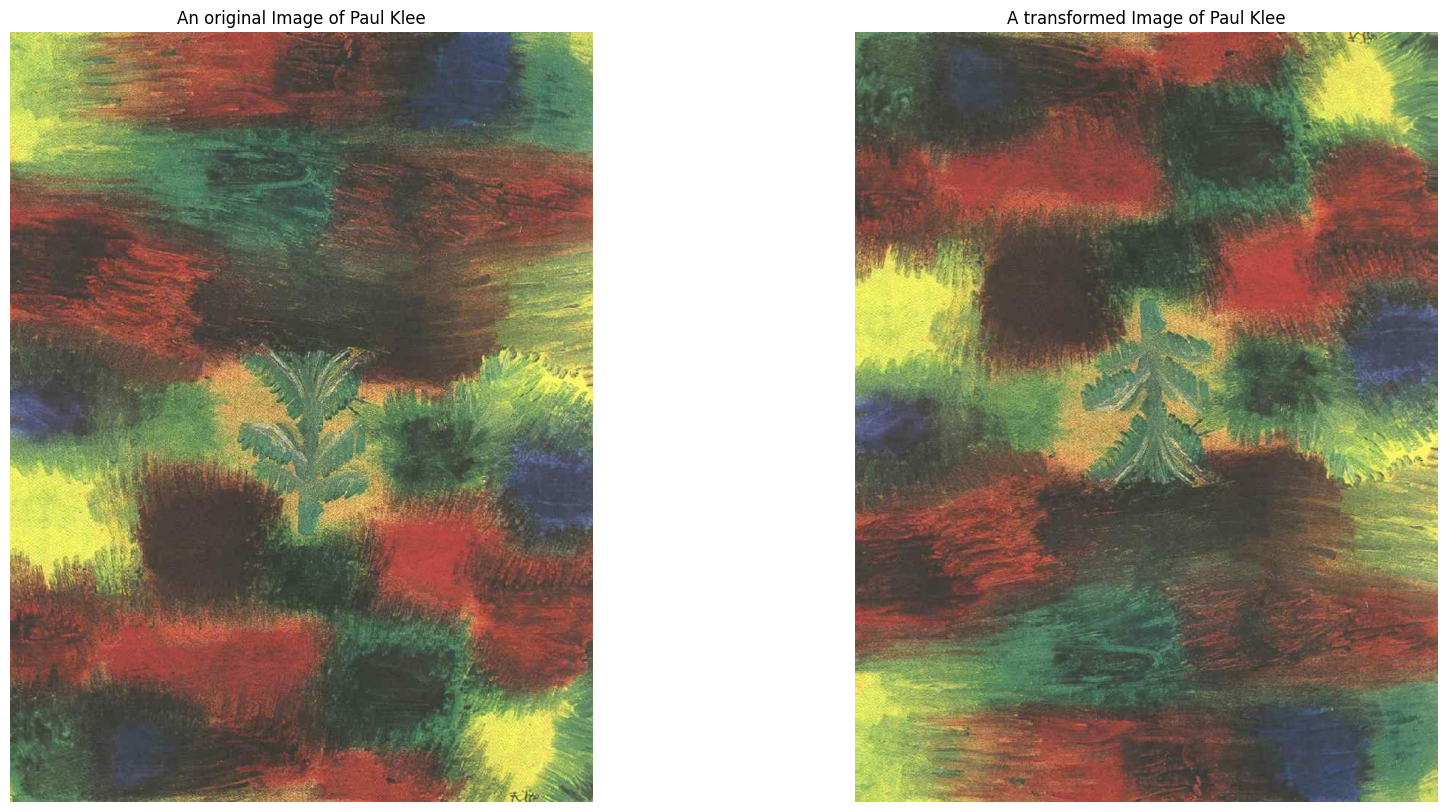

In [ ]:
# Print a random paintings and it's random augmented version
fig, axes = plt.subplots(1, 2, figsize=(20,10))

random_artist = random.choice(artists_top_name)
random_image = random.choice(os.listdir(os.path.join(images_dir, random_artist)))
random_image_file = os.path.join(images_dir, random_artist, random_image)

# Original image
image = plt.imread(random_image_file)
axes[0].imshow(image)
axes[0].set_title("An original Image of " + random_artist.replace('_', ' '))
axes[0].axis('off')

# Transformed image
aug_image = train_datagen.random_transform(image)
axes[1].imshow(aug_image)
axes[1].set_title("A transformed Image of " + random_artist.replace('_', ' '))
axes[1].axis('off')

plt.show()

In [ ]:
train_generator = train_datagen.flow_from_directory(directory=images_dir,
                                                    class_mode='categorical',
                                                    target_size=train_input_shape[0:2],
                                                    batch_size=batch_size,
                                                    subset="training",
                                                    shuffle=True,
                                                    classes=artists_top_name.tolist()
                                                   )

valid_generator = train_datagen.flow_from_directory(directory=images_dir,
                                                    class_mode='categorical',
                                                    target_size=train_input_shape[0:2],
                                                    batch_size=batch_size,
                                                    subset="validation",
                                                    shuffle=True,
                                                    classes=artists_top_name.tolist()
                                                   )

STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
print("Total number of batches =", STEP_SIZE_TRAIN, "and", STEP_SIZE_VALID)

Found 6779 images belonging to 50 classes.
Found 1667 images belonging to 50 classes.
Total number of batches = 423 and 104


In [ ]:
# Load pre-trained model
import keras
base_model = keras.applications.resnet50.ResNet50(weights='imagenet',
                                                  include_top = False,
                                                  input_shape = train_input_shape)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
base_model.trainable = True
for layer in base_model.layers[:-4]:
  layer.trainable = False

In [ ]:
from tensorflow.keras import layers

x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(256, kernel_initializer='he_uniform')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(n_classes, activation='softmax')(x)

model = keras.Model(inputs=base_model.input, outputs=outputs)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
n_epoch = 10

early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1,
                           mode='auto', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5,
                              verbose=1, mode='auto')

In [ ]:
# Train the model - all layers
history1 = model.fit(
    x=train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    validation_data=valid_generator,
    validation_steps=STEP_SIZE_VALID,
    epochs=n_epoch,
    shuffle=True,
    verbose=1,
    callbacks=[reduce_lr],
    class_weight=class_weight
)